# Library needed in this project

In [ ]:
#import library
import pandas as pd
import string
import matplotlib.pyplot as plt
import re
import numpy as np

# Load Dataset

In [ ]:
# Specify the path to CSV file
csv_file_path = 'D:Desktop/cyberbullying_tweets.csv'

In [ ]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)
df.head()

# Extract information from dataset

In [ ]:
#get info about the dataset
df.info()

print('\n')
print('Total unique value in column \'cyberbullying_type\': ')
print(df['cyberbullying_type'].value_counts())

print('\n')
null_count = df['tweet_text'].isnull().sum()
print(f'Total number of null data in column \'tweet_text\': {null_count}')

In [ ]:
# visualize dataset
plt.figure(figsize=(12, 6))
count = df['cyberbullying_type'].value_counts()
count.plot(kind='bar',color=['blue', 'red', 'green', 'purple', 'orange', 'yellow'])
plt.title('Distribution of Cyberbullying Classes in Twitter Dataset')
plt.xlabel('Attacks type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# check and display the total number of occurrences of '0' in 'target'
count_religion = df['cyberbullying_type'].value_counts().get('religion', 0)
print(f'Total number of text that label as religion attack = {count_religion}')

count_age = df['cyberbullying_type'].value_counts().get('age', 0)
print(f'Total number of text that label as age attack = {count_age}')

count_gender = df['cyberbullying_type'].value_counts().get('gender', 0)
print(f'Total number of text that label as gender attack = {count_gender}')

count_ethnicity = df['cyberbullying_type'].value_counts().get('ethnicity', 0)
print(f'Total number of text that label as ethnicity attack = {count_ethnicity}')

count_normal = df['cyberbullying_type'].value_counts().get('not_cyberbullying', 0)
print(f'Total number of text that label as not cyberbullying = {count_normal}')

count_other = df['cyberbullying_type'].value_counts().get('other_cyberbullying', 0)
print(f'Total number of text that label as other attack = {count_other}')

In [ ]:
# Group 6 classes to 2 class
def reformat_type(text):
    if text == "not_cyberbullying":
        return 0
    else:
        return 1

In [ ]:
df['hate_speech'] = df['cyberbullying_type'].apply(reformat_type)

# visualize dataset
plt.figure(figsize=(12, 6))
count = df['hate_speech'].value_counts()
count.plot(kind='bar',color=['blue', 'red'])
plt.title('Distribution of Hate Speech Classes in Twitter Dataset')
plt.xlabel('Present of Hate Speech')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

count_nonhate = df['hate_speech'].value_counts().get(0, 0)
print(f'Total number of text that label as non hate = {count_nonhate}')

count_hate = df['hate_speech'].value_counts().get(1, 0)
print(f'Total number of text that label as hate = {count_hate}')

print('Total unique value in column \'offensive\': ')
print(df['hate_speech'].value_counts())

# Lowering text

In [ ]:
# lower text to lowercase
df['clean_text'] = df['tweet_text'].apply(lambda x: x.lower())
df.head()

# URLs removal

In [ ]:
# define function to remove URLs from text using regular expression
def url_removal(text):
    url_pattern = re.compile(r'http[s]?://\S+|www\.\S+|bit.ly/\S+')
    return url_pattern.sub(r'',text)

In [ ]:
# apply function to remove URL and show before and after
print("\033[1mSample data before URL removal\033[0m")
print(df[['clean_text','hate_speech']].iloc[10:15])
print("\n")
df['clean_text'] = df['clean_text'].apply(url_removal)
print("\033[1mSample data after URL removal\033[0m")
print(df[['clean_text','hate_speech']].iloc[10:15])
print("\n")

# User mentions and HTML entity removal

In [ ]:
# define function to remove user mention and html entity using regular expression
def mention_html_removal(text):
    mention_html_pattern = re.compile(r'@\w+|&\w+;')
    cleaned_text = mention_html_pattern.sub(r'',text)
    return cleaned_text

In [ ]:
# apply function to remove user mention and html entity and show before and after
print("\033[1mSample data before user mention and html entity removal\033[0m")
print(df[['clean_text','hate_speech']].iloc[20:25])
print("\n")
df['clean_text'] = df['clean_text'].apply(mention_html_removal)
print("\033[1mSample data after user mention and html entity removal\033[0m")
print(df[['clean_text','hate_speech']].iloc[20:25])
print("\n")

# Emojis removal

In [ ]:
# define function to remove emojis in text using regular expression
def emojis_removal(text):
     emoji_pattern = re.compile("["
                               "\U0001F600-\U0001F64F"  # Emoticons
                               "\U0001F300-\U0001F5FF"  # Miscellaneous Symbols and Pictographs
                               "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                               "\U0001F700-\U0001F77F"  # Alchemical Symbols
                               "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               "\U0001FA00-\U0001FA6F"  # Chess Symbols
                               "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               "\U00002702-\U000027B0"  # Dingbats
                               "]+", flags=re.UNICODE)

     # Remove emojis using the regular expression
     cleaned_text = emoji_pattern.sub(r'', text)
     return cleaned_text

In [ ]:
# apply function to remove emojis in text and show before and after
print("\033[1mSample data before emojis and other symbols removal\033[0m")
print(df[['clean_text','hate_speech']].iloc[20:25])
print("\n")
df['clean_text'] = df['clean_text'].apply(emojis_removal)
print("\033[1mSample data after emojis and other symbols removal\033[0m")
print(df[['clean_text','hate_speech']].iloc[20:25])
print("\n")

# Stopword removal

In [ ]:
# import stopwords form nltk library and define function to remove stopwords from text
import nltk
from nltk.corpus import stopwords

def stopwords_removal(text):
    word_list = text.split()
    no_stopwords = []
    
    for word in word_list:
        if word not in stopwords.words('english'):
            no_stopwords.append(word)
    
    return ' '.join(no_stopwords)

In [ ]:
# apply function to remove stopwords and show before and after
print("\033[1mSample data before stopwords removal\033[0m")
print(df[['clean_text','hate_speech']].iloc[20:25])
print("\n")
df['clean_text'] = df['clean_text'].apply(stopwords_removal)
print("\033[1mSample data after stopwords removal\033[0m")
print(df[['clean_text','hate_speech']].iloc[20:25])
print("\n")

# remove repeating punctuation marks

In [39]:
def remove_repeating_punctuation(text):
    pattern = re.compile(r'([^\w\s])\1+')
    cleaned_text = re.sub(pattern, r'\1', text)

    return cleaned_text

In [42]:
text = remove_repeating_punctuation('i looo54 !!!!!!@@@######')
print(text)

i looo54 !@#


In [ ]:
# apply function to remove stopwords and show before and after
print("\033[1mSample data before removing repeating punctuation mark\033[0m")
print(df[['clean_text','hate_speech']].iloc[20:25])
print("\n")
df['clean_text'] = df['clean_text'].apply(remove_repeating_punctuation)
print("\033[1mSample data after removing repeating punctuation mark\033[0m")
print(df[['clean_text','hate_speech']].iloc[20:25])
print("\n")

# Check null data

In [ ]:
# define function to remove rows with empty space and nothing inside
def check_null(text):
    text = text.lstrip()
    if not text or text.isspace():
        return None
    else:
        return text

In [ ]:
# apply function to remove rows with empty and show before and after
print("\033[1mSample data before reformat text and check null\033[0m")
print(df[['clean_text','hate_speech']].iloc[20:25])
print("\n")
df['clean_text'] = df['clean_text'].apply(check_null)
print("\033[1mSample data after check null\033[0m")
print(df[['clean_text','hate_speech']].iloc[20:25])
print("\n")

In [ ]:
null_count = df['clean_text'].isnull().sum()
print('Total number of rows with null value in column \'clean_text\' = ', null_count)
df = df.dropna(subset=['clean_text'])
df = df.reset_index(drop=True)
df.info()

# get tweets length

In [1]:
#import library
import pandas as pd
import string
import matplotlib.pyplot as plt
import re
import numpy as np

df = pd.read_csv(r"D:\\FYP\cyberbullying_preprocessed.csv")

In [2]:
df["text_length"] = df["clean_text"].apply(lambda x: len(x.split()))
df.head()

,tweet_text,cyberbullying_type,hate_speech,clean_text,text_length
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0,"words #katandandre, food crapilicious! #mkr",5
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0,#aussietv white? #mkr #theblock #imacelebritya...,11
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0,classy whore? red velvet cupcakes?,5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0,"meh. p thanks heads up, concerned another angr...",10
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0,isis account pretending kurdish account. like ...,8


In [3]:
# get min length of text
min_length = df['text_length'].min()
print(min_length)

# get max length of text
max_length = df['text_length'].max()
print(max_length)

1
415


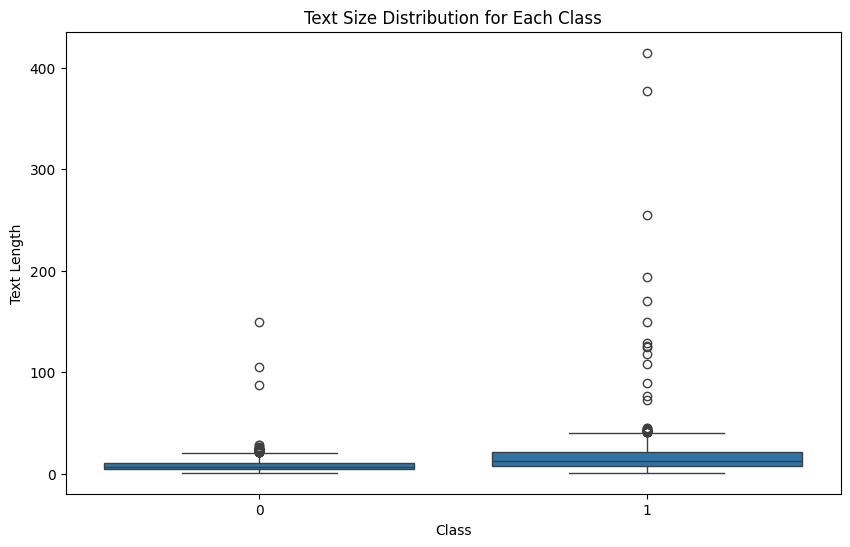

In [4]:
# visualize the size of text for each classes
import seaborn as sns

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='hate_speech', y='text_length', data=df)
plt.title('Text Size Distribution for Each Class')
plt.xlabel('Class')
plt.ylabel('Text Length')
plt.show()

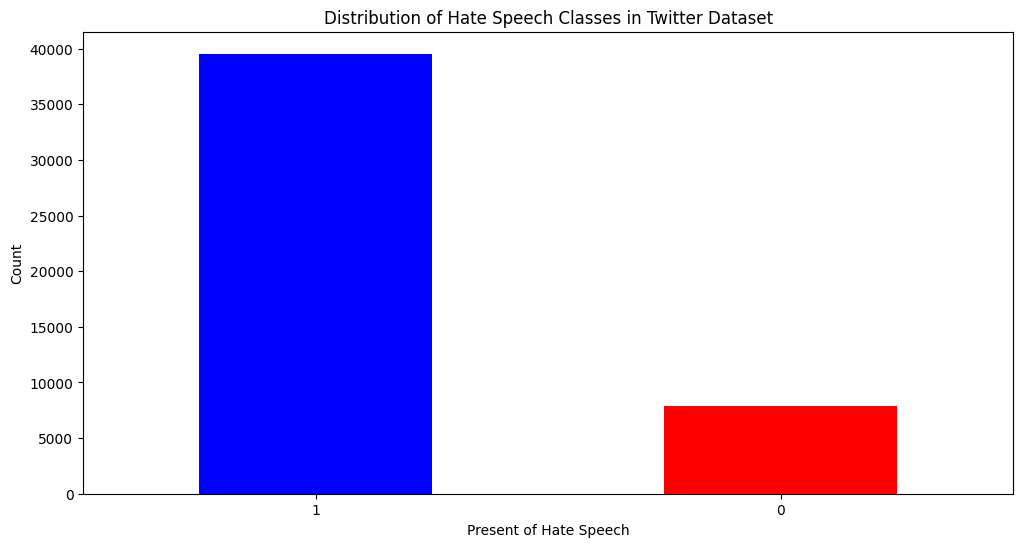

Total number of text that label as non hate = 7847
Total number of text that label as hate = 39538
Total unique value in column 'hate_speech': 
hate_speech
1    39538
0     7847
Name: count, dtype: int64


In [5]:
# visualize dataset
df100 = df[df['text_length'] <= 100].copy()

plt.figure(figsize=(12, 6))
count = df100['hate_speech'].value_counts()
count.plot(kind='bar',color=['blue', 'red'])
plt.title('Distribution of Hate Speech Classes in Twitter Dataset')
plt.xlabel('Present of Hate Speech')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# check and display the total number of occurrences of '0' in 'target'
count_nonhate = df100['hate_speech'].value_counts().get(0, 0)
print(f'Total number of text that label as non hate = {count_nonhate}')

count_hate = df100['hate_speech'].value_counts().get(1, 0)
print(f'Total number of text that label as hate = {count_hate}')

print('Total unique value in column \'hate_speech\': ')
print(df100['hate_speech'].value_counts())

# Train Validation Test Split

In [6]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

X = df100['clean_text'].values
y = df100['hate_speech'].values

# split X and y into train test validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=77)

print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('type of X_train: ', type(X_train))
print('type of y_train: ', type(y_train))


# instantiate the RandomOverSampler
undersampler = RandomUnderSampler(random_state=66)
X_train, y_train = undersampler.fit_resample(X_train.reshape(-1,1), y_train)
X_train = X_train.flatten()
#y_train = pd.Series(y_train_resampled)

print('\n\ntype of X_train: ', type(X_train))
print('type of y_train: ', type(y_train))

# convert target to array
#y_train = np.asarray(y_train).astype('float32')

# printing shape
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)

# printing shape
print('Shape of X val:', X_val.shape)
print('Shape of y val:', y_val.shape)

# printing shape
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (37908,)
Shape of y train: (37908,)
type of X_train:  <class 'numpy.ndarray'>
type of y_train:  <class 'numpy.ndarray'>


type of X_train:  <class 'numpy.ndarray'>
type of y_train:  <class 'numpy.ndarray'>
Shape of X train: (12618,)
Shape of y train: (12618,)
Shape of X val: (4739,)
Shape of y val: (4739,)
Shape of X test: (4738,)
Shape of y test: (4738,)


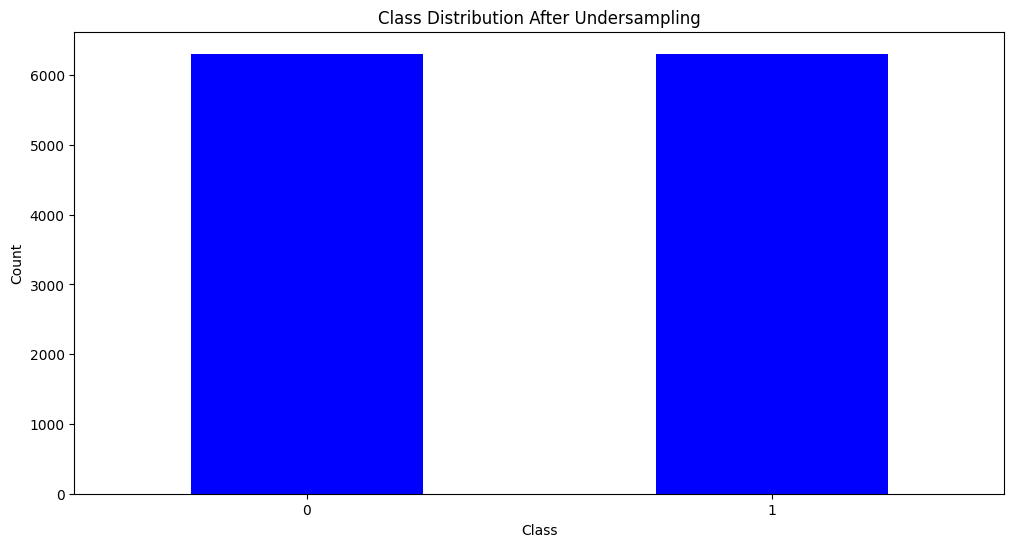

Total number of text that label as non hate = 6309
Total number of text that label as hate = 6309
Total unique value in column 'hate_speech': 
hate_speech
0    6309
1    6309
Name: count, dtype: int64


In [7]:
# Create a DataFrame to display the class distribution
new_df = pd.DataFrame({'hate_speech': y_train})
class_counts = new_df['hate_speech'].value_counts()

# Plot a bar graph
plt.figure(figsize=(12, 6))
class_counts.plot(kind='bar', color='blue')
plt.title('Class Distribution After Undersampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

count_nonhate = new_df['hate_speech'].value_counts().get(0, 0)
print(f'Total number of text that label as non hate = {count_nonhate}')

count_hate = new_df['hate_speech'].value_counts().get(1, 0)
print(f'Total number of text that label as hate = {count_hate}')

print('Total unique value in column \'hate_speech\': ')
print(new_df['hate_speech'].value_counts())

# Subword Tokenization

In [8]:
import torch

def bert_tokenizer(data):
    input_ids = []
    attention_masks = []
    for sent in data:
        encoded_sent = tokenizer.encode_plus(
            text=sent,
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]` special tokens
            max_length=max_len,             # Choose max length to truncate/pad
            padding='max_length',         # Pad sentence to max length 
            return_attention_mask=True      # Return attention mask
            )
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

In [9]:
import tokenizers
from transformers import AutoTokenizer, BertTokenizer

tokenizer = AutoTokenizer.from_pretrained('facebook/roberta-hate-speech-dynabench-r4-target')

# Tokenize train tweets
encoded_tweets = [tokenizer.encode(sent, add_special_tokens=True) for sent in X]

# Find the longest tokenized tweet
max_len = max([len(sent) for sent in encoded_tweets])
print('Max length: ', max_len)

Max length:  153


In [10]:
train_inputs, train_masks = bert_tokenizer(X_train)
val_inputs, val_masks = bert_tokenizer(X_val)
test_inputs, test_masks = bert_tokenizer(X_test)

In [11]:
train_inputs[1]

tensor([    0, 22776,   219, 33072,   293,  1095,     4,     2,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1, 

In [12]:
train_masks[1]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
# Convert target columns to pytorch tensors format
train_labels = torch.from_numpy(y_train)
val_labels = torch.from_numpy(y_val)
test_labels = torch.from_numpy(y_test)

In [14]:
train_labels

tensor([0, 0, 0,  ..., 1, 1, 1])

In [15]:
# printing shape
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)

# printing shape
print('Shape of X val:', X_val.shape)
print('Shape of y val:', y_val.shape)

# printing shape
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (12618,)
Shape of y train: (12618,)
Shape of X val: (4739,)
Shape of y val: (4739,)
Shape of X test: (4738,)
Shape of y test: (4738,)


# Data Loader

In [16]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
print(type(train_data))
# Assuming train_labels is a tensor
unique_values, counts = torch.unique(train_labels, return_counts=True)

# Print the unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Label: {value}, Count: {count}")

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)

# Create the DataLoader for our test set
test_data = TensorDataset(test_inputs, test_masks, test_labels)

<class 'torch.utils.data.dataset.TensorDataset'>
Label: 0, Count: 6309
Label: 1, Count: 6309


# Training Model

In [17]:
from transformers import AutoModelForSequenceClassification
import os
import torch
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device
model = AutoModelForSequenceClassification.from_pretrained('facebook/roberta-hate-speech-dynabench-r4-target', num_labels=2)
for name, params in model.named_parameters():
    params.requires_grad = False
    if "dense" in name or "out_proj" in name:
        params.requires_grad = True
        print(name, '\nRequires_grad : ', params.requires_grad, '\n\n')
model.to(device)

roberta.encoder.layer.0.attention.output.dense.weight 
Requires_grad :  True 


roberta.encoder.layer.0.attention.output.dense.bias 
Requires_grad :  True 


roberta.encoder.layer.0.intermediate.dense.weight 
Requires_grad :  True 


roberta.encoder.layer.0.intermediate.dense.bias 
Requires_grad :  True 


roberta.encoder.layer.0.output.dense.weight 
Requires_grad :  True 


roberta.encoder.layer.0.output.dense.bias 
Requires_grad :  True 


roberta.encoder.layer.1.attention.output.dense.weight 
Requires_grad :  True 


roberta.encoder.layer.1.attention.output.dense.bias 
Requires_grad :  True 


roberta.encoder.layer.1.intermediate.dense.weight 
Requires_grad :  True 


roberta.encoder.layer.1.intermediate.dense.bias 
Requires_grad :  True 


roberta.encoder.layer.1.output.dense.weight 
Requires_grad :  True 


roberta.encoder.layer.1.output.dense.bias 
Requires_grad :  True 


roberta.encoder.layer.2.attention.output.dense.weight 
Requires_grad :  True 


roberta.encoder.layer.2.atte

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [18]:
from transformers import TrainingArguments

from transformers import TrainingArguments

training_args = TrainingArguments(output_dir="RoBERTa Hate Speech downsampled",
                                  overwrite_output_dir=True,
                                  num_train_epochs=20,
                                  evaluation_strategy='epoch',
                                  save_strategy='epoch',
                                  load_best_model_at_end=True,
                                  save_total_limit = 10,
                                  per_device_train_batch_size=16,
                                  learning_rate=1e-5,
                                  metric_for_best_model="eval_f1",)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    
    # Calculate accuracy
    accuracy = accuracy_score(labels, preds)

   # Calculate precision, recall, and F1-score
    precision = precision_score(labels, preds, average='weighted')
    recall = recall_score(labels, preds, average='weighted')
    f1 = f1_score(labels, preds, average='weighted')
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

In [20]:
def custom_data_collator(features):
    batch = {}
    batch['input_ids'] = torch.stack([f[0] for f in features])
    batch['attention_mask'] = torch.stack([f[1] for f in features])
    batch['labels'] = torch.stack([f[2] for f in features])

    return batch

In [21]:
from transformers import Trainer
from transformers import EarlyStoppingCallback

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=val_data,
    data_collator=custom_data_collator,  # Use the data collator
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(3, 0.001)]
)

In [22]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.432800,0.373457,0.802279,0.893083,0.802279,0.825044
2,0.325800,0.385419,0.806499,0.895969,0.806499,0.828707
3,0.293100,0.342869,0.814940,0.893974,0.814940,0.835281
4,0.254200,0.387930,0.826335,0.888392,0.826335,0.843612
5,0.230400,0.583080,0.822325,0.889583,0.822325,0.840625
6,0.195500,0.557007,0.826757,0.884532,0.826757,0.843390
7,0.176900,0.735272,0.825069,0.887053,0.825069,0.842440


TrainOutput(global_step=5523, training_loss=0.2686700569683284, metrics={'train_runtime': 7977.7256, 'train_samples_per_second': 31.633, 'train_steps_per_second': 1.978, 'total_flos': 6944630278488840.0, 'train_loss': 0.2686700569683284, 'epoch': 7.0})

In [23]:
def model_init(trial):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(device)
    model = AutoModelForSequenceClassification.from_pretrained('facebook/roberta-hate-speech-dynabench-r4-target', num_labels=2)
    for name, params in model.named_parameters():
        params.requires_grad = False
        if "dense" in name or "out_proj" in name:
            params.requires_grad = True
    model.to(device)
    return model

In [24]:
tuner = Trainer(
    model=None,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=val_data,
    data_collator=custom_data_collator,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(3, 0.001)],
    model_init=model_init,
)

cuda


In [25]:
import optuna
from optuna.samplers import GridSampler

def optuna_hp_space(trial):
    return {
       "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e-4, log=True),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [8, 16, 32])
    }

In [26]:
def train_objective(metrics):
    f1 = list(metrics.values())[4]
    return f1

In [27]:
best_trials = tuner.hyperparameter_search(
    direction="maximize",
    backend="optuna",
    hp_space=optuna_hp_space,
    n_trials=6,
    compute_objective=train_objective,
)

[I 2024-04-16 22:04:08,858] A new study created in memory with name: no-name-40b5d42a-8ebe-41e2-8769-332ee84cdd0f


cuda


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.465200,0.397703,0.811353,0.883467,0.811353,0.831228
2,0.455300,0.402781,0.807132,0.887056,0.807132,0.828318
3,0.465800,0.533985,0.598861,0.879450,0.598861,0.646719
4,0.697200,0.691316,0.837096,0.700730,0.837096,0.762867


C:\Users\MyHP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2024-04-16 23:32:13,298] Trial 0 finished with value: 0.7628673450655337 and parameters: {'learning_rate': 6.477601572465933e-05, 'per_device_train_batch_size': 8}. Best is trial 0 with value: 0.7628673450655337.


cuda


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.409100,0.378189,0.800802,0.892990,0.800802,0.823846
2,0.307100,0.361388,0.816839,0.900127,0.816839,0.837421
3,0.267300,0.338662,0.815573,0.895929,0.815573,0.835990
4,0.224900,0.403476,0.827601,0.888311,0.827601,0.844590
5,0.193800,0.654357,0.828023,0.889861,0.828023,0.845133
6,0.167300,0.597820,0.821903,0.885607,0.821903,0.839770
7,0.157900,0.759865,0.816206,0.887071,0.816206,0.835494


[I 2024-04-17 02:05:03,294] Trial 1 finished with value: 0.8354940949492838 and parameters: {'learning_rate': 1.9395051503822156e-05, 'per_device_train_batch_size': 16}. Best is trial 1 with value: 0.8354940949492838.


cuda


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.406000,0.358336,0.800591,0.894007,0.800591,0.823766
2,0.304500,0.347452,0.815995,0.900173,0.815995,0.836745
3,0.260000,0.364787,0.824014,0.895956,0.824014,0.842726
4,0.220500,0.445997,0.822325,0.891287,0.822325,0.840838
5,0.190700,0.622488,0.827179,0.890554,0.827179,0.844564
6,0.151700,0.643231,0.817261,0.888111,0.817261,0.836454
7,0.151600,0.864550,0.818105,0.883739,0.818105,0.836551
8,0.129100,0.791856,0.840051,0.884560,0.840051,0.853602
9,0.126600,1.068268,0.823802,0.886426,0.823802,0.841365
10,0.096400,1.092374,0.818527,0.887985,0.818527,0.837435


[I 2024-04-17 05:13:44,688] Trial 2 finished with value: 0.844176792606856 and parameters: {'learning_rate': 2.2662431177026593e-05, 'per_device_train_batch_size': 16}. Best is trial 2 with value: 0.844176792606856.


cuda


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.461200,0.420001,0.820004,0.879581,0.820004,0.837429
2,0.552500,0.517586,0.844904,0.867170,0.844904,0.853268
3,0.459300,0.413242,0.775480,0.893491,0.775480,0.803265
4,0.437900,0.427528,0.797004,0.893427,0.797004,0.820817
5,0.737100,0.782381,0.162904,0.026538,0.162904,0.045640


C:\Users\MyHP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2024-04-17 06:54:36,680] Trial 3 finished with value: 0.045640193456820174 and parameters: {'learning_rate': 7.883772611582664e-05, 'per_device_train_batch_size': 8}. Best is trial 2 with value: 0.844176792606856.


cuda


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.420000,0.403505,0.797215,0.890792,0.797215,0.820758
2,0.384100,0.545524,0.763241,0.898278,0.763241,0.793363
3,0.394400,0.403757,0.776746,0.900152,0.776746,0.804685
4,0.348000,0.431732,0.779700,0.899838,0.779700,0.807113


[I 2024-04-17 08:32:18,284] Trial 4 finished with value: 0.807112778283594 and parameters: {'learning_rate': 4.9846355991629746e-05, 'per_device_train_batch_size': 8}. Best is trial 2 with value: 0.844176792606856.


cuda


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.402800,0.360199,0.798481,0.893236,0.798481,0.821995


[I 2024-04-17 08:55:30,527] Trial 5 pruned. 


## Figures

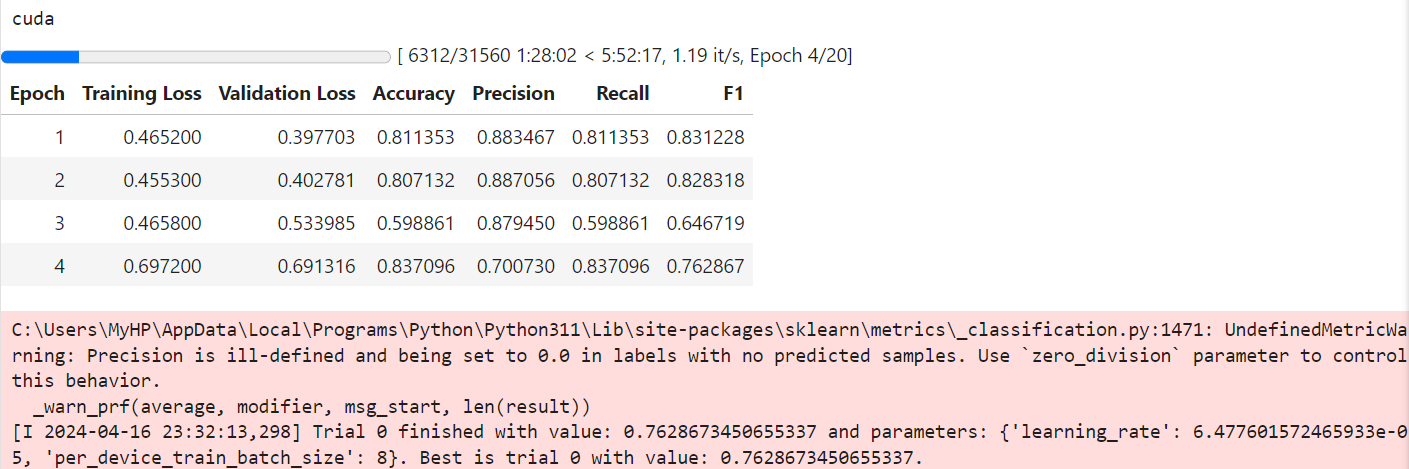

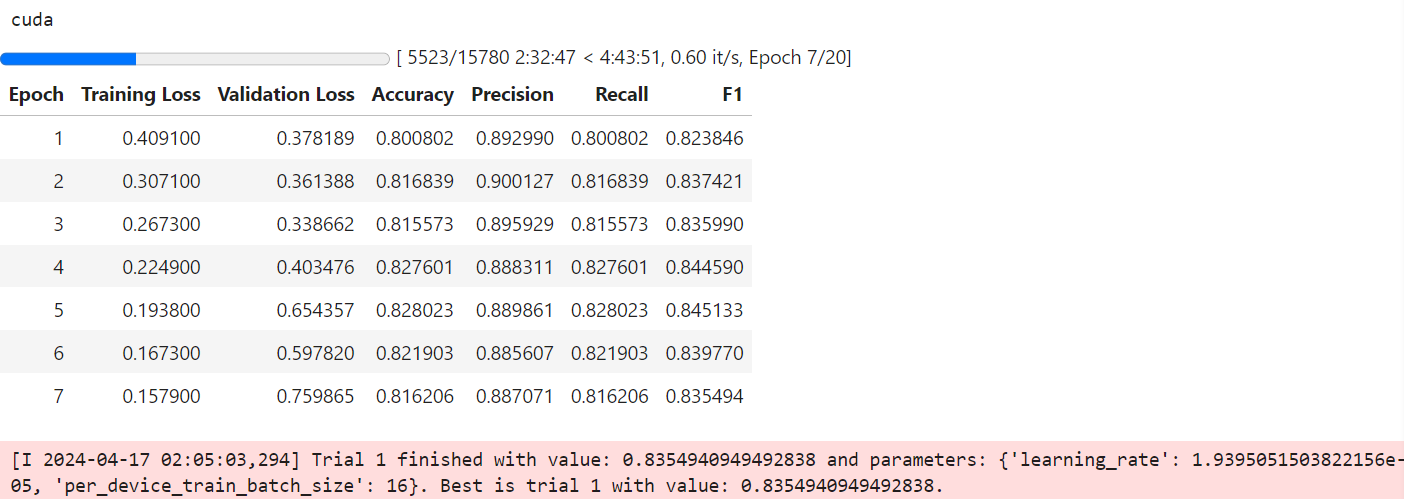

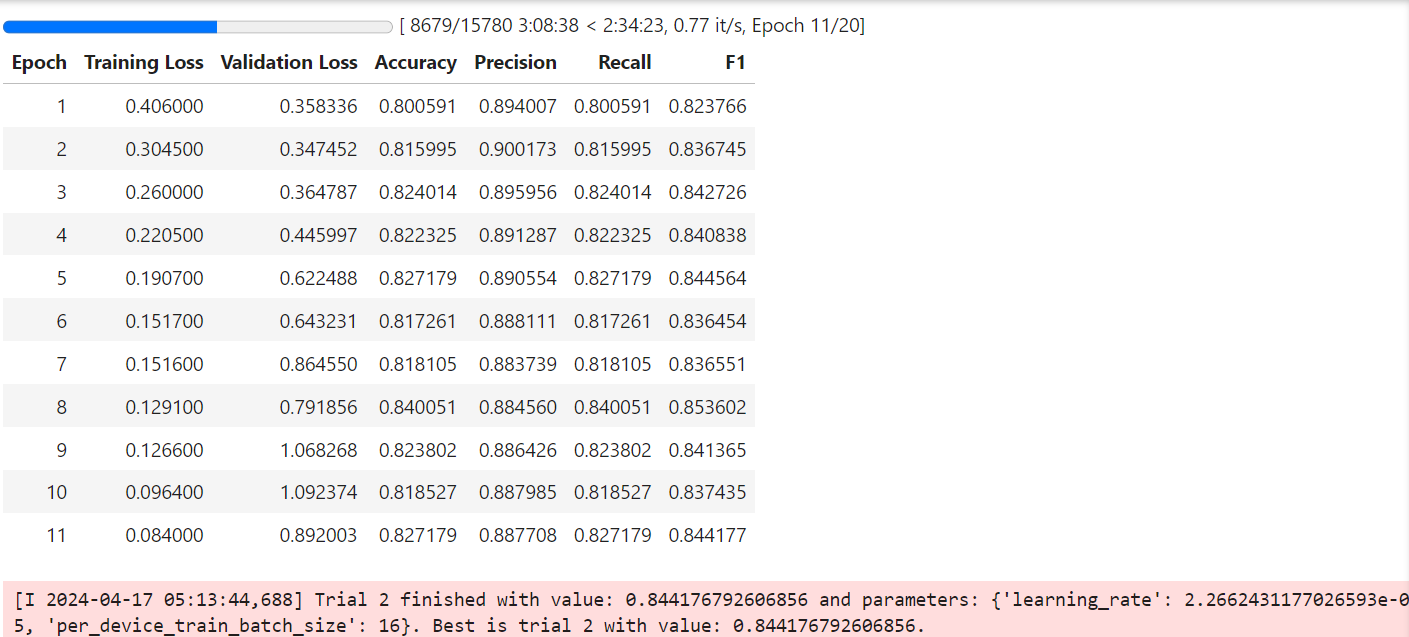

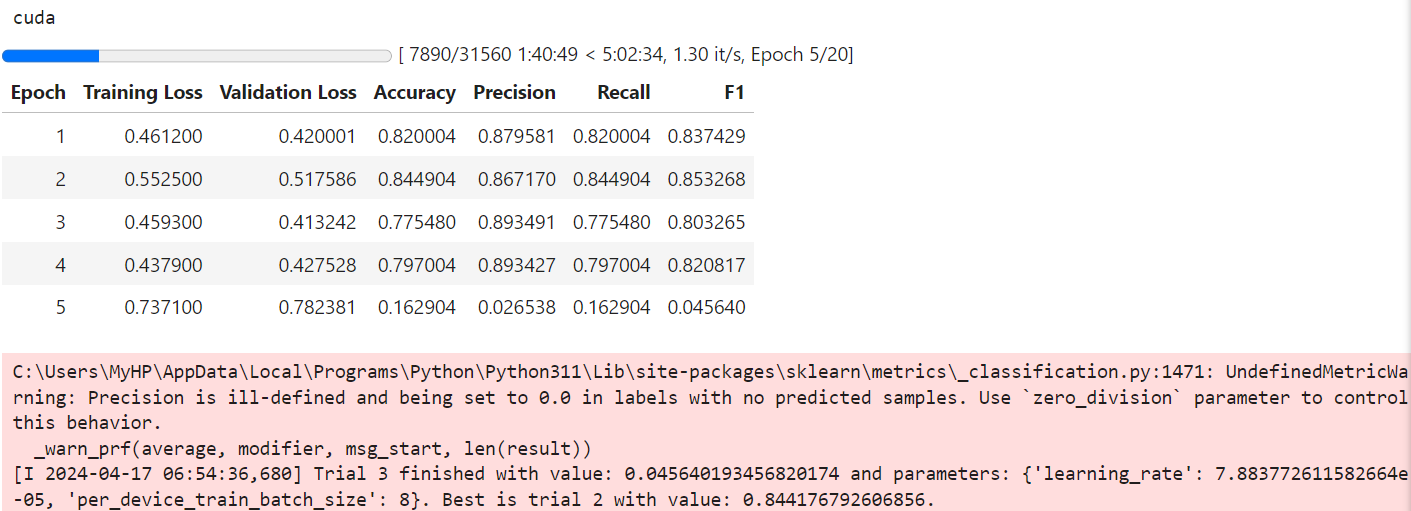

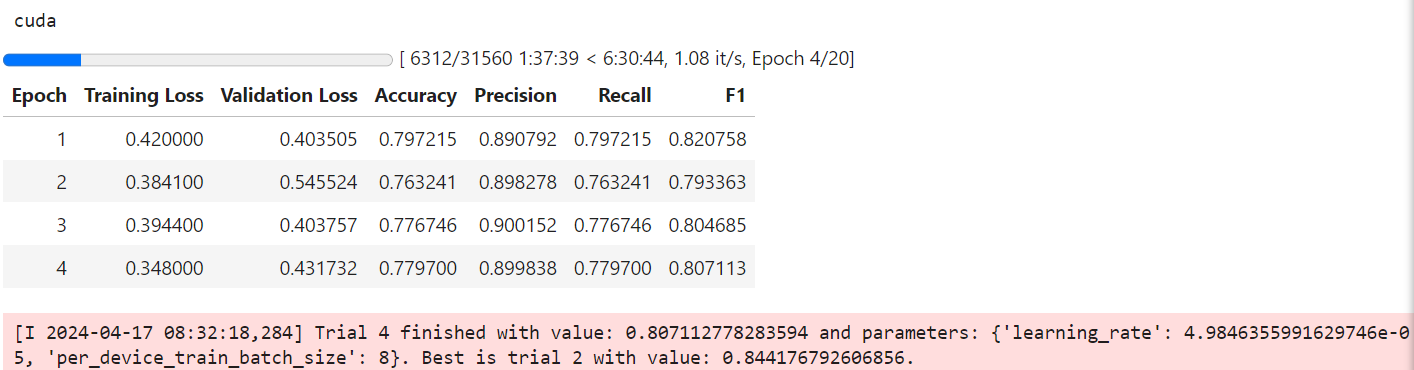

In [22]:
best_model = AutoModelForSequenceClassification.from_pretrained('facebook/roberta-hate-speech-dynabench-r4-target', num_labels=2)
for name, params in best_model.named_parameters():
    params.requires_grad = False
    if "dense" in name or "out_proj" in name:
        params.requires_grad = True

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
best_model.to(device)

cuda


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [23]:
best_trainer = Trainer(
    model=best_model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=val_data,
    data_collator=custom_data_collator,  # Use the data collator
    compute_metrics=compute_metrics
)

In [24]:
training_args = best_trainer.args

# Set the configuration parameters
training_args.output_dir="RoBERTa Hate downsampled tuned"
training_args.per_device_train_batch_size = 16
training_args.learning_rate = 2.2662431177026593e-5
training_args.num_train_epochs = 8

In [25]:
best_trainer.args.learning_rate

2.2662431177026593e-05

In [26]:
best_trainer.args.output_dir

'RoBERTa Hate downsampled tuned'

In [27]:
best_trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.405400,0.375686,0.794682,0.893702,0.794682,0.818960
2,0.303000,0.373020,0.819582,0.899802,0.819582,0.839594
3,0.262100,0.382205,0.820848,0.897843,0.820848,0.840408
4,0.218300,0.499563,0.821481,0.888606,0.821481,0.839837
5,0.180200,0.649064,0.827390,0.887304,0.827390,0.844284
6,0.156900,0.668158,0.833931,0.882383,0.833931,0.848564
7,0.132100,0.819251,0.834353,0.882976,0.834353,0.848986
8,0.113000,0.899004,0.833087,0.885236,0.833087,0.848386


TrainOutput(global_step=6312, training_loss=0.22047158883098414, metrics={'train_runtime': 7506.6862, 'train_samples_per_second': 13.447, 'train_steps_per_second': 0.841, 'total_flos': 7936720318272960.0, 'train_loss': 0.22047158883098414, 'epoch': 8.0})

In [28]:
best_trainer.evaluate(test_data)

{'eval_loss': 0.8694236278533936,
 'eval_accuracy': 0.8220768256648375,
 'eval_precision': 0.8770468696597767,
 'eval_recall': 0.8220768256648375,
 'eval_f1': 0.8387167957965095,
 'eval_runtime': 179.0196,
 'eval_samples_per_second': 26.466,
 'eval_steps_per_second': 3.312,
 'epoch': 8.0}

In [29]:
predictions = best_trainer.predict(test_data)

(4738,)


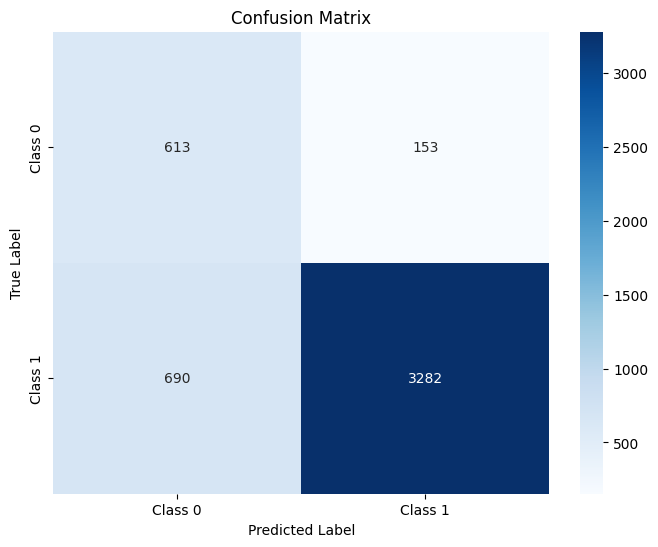

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Extract predicted labels from predictions
predicted_labels = np.argmax(predictions.predictions, axis=1)
print(predicted_labels.shape)

# Extract true labels from the test dataset
true_labels = predictions.label_ids

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [31]:
best_trainer.save_model("transformerModels/RoBERTa Downsampled")

In [ ]:
test = AutoModelForSequenceClassification.from_pretrained("transformerModels/RoBERTa Downsampled")

In [ ]:
test.to(device)

In [ ]:
test_trainer = Trainer(
    model=test,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=val_data,
    data_collator=custom_data_collator,  # Use the data collator
    compute_metrics=compute_metrics
)

In [ ]:
test_trainer.evaluate(test_data)